In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re as re

In [2]:
#load BLS datasets 
df_records = pd.read_csv('../wk2/bls/records.csv')
df_series = pd.read_csv('../wk2/bls/series.csv')

In [3]:
df_records.tail()

,series_id,blsid,period,value,footnote
609202,3368,LAUST280000000000006-DELTA,2010-10-01,2.298105,NaN
609203,3368,LAUST280000000000006-DELTA,2009-12-01,-3.630368,NaN
609204,3368,LAUST280000000000006-DELTA,2003-06-01,0.523724,NaN
609205,3368,LAUST280000000000006-DELTA,2013-12-01,-4.571288,NaN
609206,3368,LAUST280000000000006-DELTA,2004-08-01,-0.273596,NaN


In [4]:
df_series.head()

,id,blsid,title,source,is_primary,delta_id,is_delta,is_adjusted
0,1613,LNS12300000,Employment-Population Ratio,CPS,t,1686.0,f,f
1,1615,LNS12600000,"Employed, Usually Work Part Time",CPS,t,1688.0,f,f
2,1616,LNU02036012,"Employment Level, Nonag. Industries, With a Jo...",CPS,t,1689.0,f,f
3,1617,LNS14027689,"Unemployment Rate - 25 Years & Over, Some Coll...",CPS,t,1690.0,f,f
4,1618,LNS13327709,Alternative measure of labor underutilization U-6,CPS,t,1691.0,f,f


In [5]:
#rename the series_id column to "id"
df_records = df_records.rename(columns=lambda x: re.sub('^series_','',x))
df_records.head()


,id,blsid,period,value,footnote
0,1,LAUST280000000000006,2008-03-01,1312045.0,NaN
1,1,LAUST280000000000006,2008-01-01,1313585.0,NaN
2,1,LAUST280000000000006,2008-02-01,1311059.0,NaN
3,1,LAUST280000000000006,2002-07-01,1294242.0,NaN
4,1,LAUST280000000000006,2007-12-01,1330529.0,NaN


In [6]:
#rename the value column to "rec_value"
df_records.rename(columns={'value':'rec_value'}, inplace=True)
df_records.head()

,id,blsid,period,rec_value,footnote
0,1,LAUST280000000000006,2008-03-01,1312045.0,NaN
1,1,LAUST280000000000006,2008-01-01,1313585.0,NaN
2,1,LAUST280000000000006,2008-02-01,1311059.0,NaN
3,1,LAUST280000000000006,2002-07-01,1294242.0,NaN
4,1,LAUST280000000000006,2007-12-01,1330529.0,NaN


In [7]:
#drop the footnote col since it's all NaN
df_records.drop(columns=['footnote'],inplace=True)

In [8]:
#merge the two datasets by id and 
df_merge = df_records.merge(df_series, left_on=['id','blsid'], 
                                 right_on=['id', 'blsid'], how='inner' )
df_merge.head()
df_merge.shape()

,id,blsid,period,rec_value,title,source,is_primary,delta_id,is_delta,is_adjusted
0,1,LAUST280000000000006,2008-03-01,1312045.0,"Mississippi, not seasonally adjusted - labor f...",LAUS,t,3368.0,f,f
1,1,LAUST280000000000006,2008-01-01,1313585.0,"Mississippi, not seasonally adjusted - labor f...",LAUS,t,3368.0,f,f
2,1,LAUST280000000000006,2008-02-01,1311059.0,"Mississippi, not seasonally adjusted - labor f...",LAUS,t,3368.0,f,f
3,1,LAUST280000000000006,2002-07-01,1294242.0,"Mississippi, not seasonally adjusted - labor f...",LAUS,t,3368.0,f,f
4,1,LAUST280000000000006,2007-12-01,1330529.0,"Mississippi, not seasonally adjusted - labor f...",LAUS,t,3368.0,f,f


In [9]:
# sort period colum in chronological order
df_merge.sort_values(by=['period'],inplace=True)

In [10]:
#extract the year and month inforamtion using the pd time series function
df_merge['period'] = pd.to_datetime(df_merge['period'])
df_merge['year'] = df_merge['period'].dt.year
df_merge['month'] = df_merge['period'].dt.month
df_merge.head()

,id,blsid,period,rec_value,title,source,is_primary,delta_id,is_delta,is_adjusted,year,month
242450,1333,SMU01000002000000001,2000-01-01,101.1,"Alabama, Construction, Not seasonally adjusted...",CESSM,t,2684.0,f,f,2000,1
143064,787,SMS20000002000000001,2000-01-01,66.5,"Kansas, Construction, Seasonally adjusted - la...",CESSM,t,2139.0,f,t,2000,1
14014,78,LAUST240000000000006,2000-01-01,2763818.0,"Maryland, not seasonally adjusted - labor force",LAUS,t,3037.0,f,f,2000,1
158215,870,SMS41000004000000001,2000-01-01,321.3,"Oregon, Trade, Transportation, and Utilities, ...",CESSM,t,2222.0,f,t,2000,1
149426,822,SMU49000000000000001,2000-01-01,1044.9,"Utah, Total Nonfarm, Not seasonally adjusted -...",CESSM,t,2174.0,f,f,2000,1


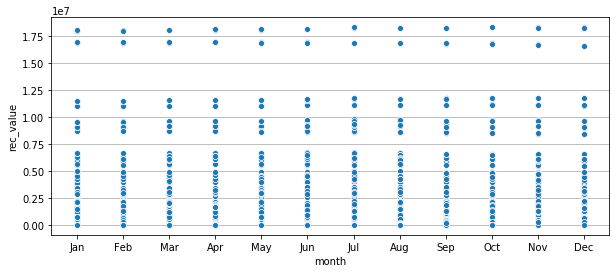

In [11]:
#start plotting
#make a dict for month
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',
                    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

data_for_plot = df_merge.replace({'month':month_dict}) 

#plot rec_value by month for the year of 2008
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.grid(axis='y')
ax.set_axisbelow(True)
plot_data = sns.scatterplot('month', 'rec_value',
                             ax=ax, data=data_for_plot.loc[data_for_plot.year == 2008],
                             palette= "husl")

